# 📓 My Jupyter Notebook Notes

## ✨ Introduction
This notebook contains some basic **Markdown syntax** to help me write cleaner and more organized notes.

---

## 🛠️ Formatting Examples

### Text Styles
- *Italic*
- **Bold**
- ***Bold and Italic***
- ~~Strikethrough~~

### Lists
#### Unordered:
- Apple
- Banana
  - Yellow Banana
  - Green Banana

#### Ordered:
1. Wake up
2. Eat breakfast
   1. Eggs
   2. Toast
3. Study

---

### 🔗 Links and Images

Link to [Google](https://www.google.com)  
![Sample Image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/512px-Jupyter_logo.svg.png)

---

### 💻 Code Examples

Inline code: `print("Hello!")`

```python
# Python code block
def greet(name):
    return f"Hello, {name}!"

greet("Jupyter")


> This is a blockquote.
>> Nested blockquote.


# Weather Data Analysis

##### Import libraries and Load Dataset

In [5]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
weather_df = pd.read_csv('weather_data.csv')

##### Overview of the weather data

#### Exploratory Data Analysis

##### Temperature Changes over Time

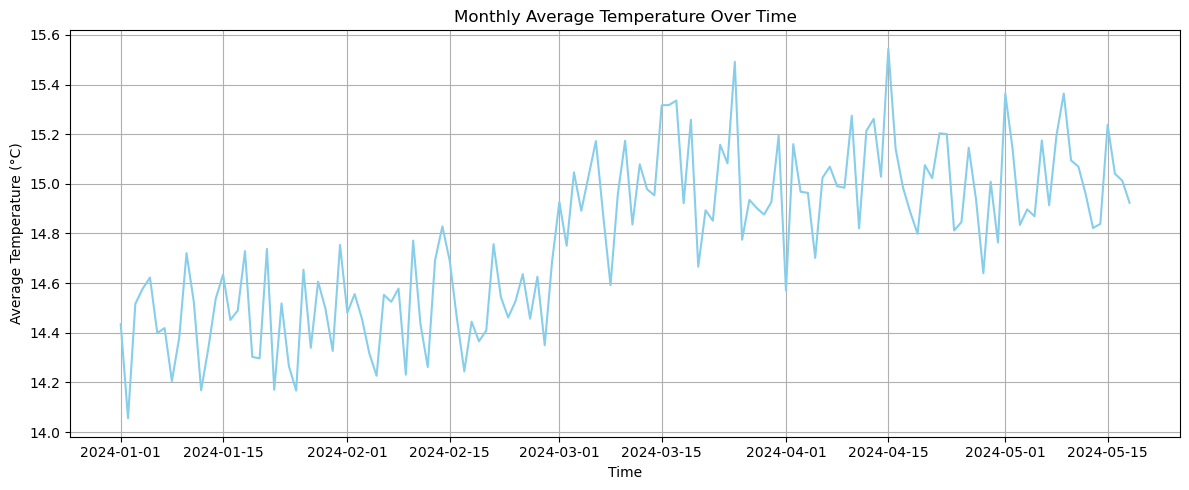

In [9]:
# Convert 'Date_Time' to datetime
weather_df['Date_Time'] = pd.to_datetime(weather_df['Date_Time'])

# Set as index (required for resampling)
weather_df.set_index('Date_Time', inplace=True)

# Now resample and plot
monthly_temp = weather_df['Temperature_C'].resample('D').mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_temp.index, monthly_temp.values, color='skyblue')
plt.xlabel('Time')
plt.ylabel('Average Temperature (°C)')
plt.title('Monthly Average Temperature Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


That's a great mindset — asking good questions is half the work in data analysis. Based on your weather dataset (which includes timestamped temperature, humidity, wind speed, etc.), here are some **insightful and practical EDA questions** you can explore:

---

### 🔍 **Trend & Time-based Questions**

1. **How does temperature change over time?**

   * Daily, weekly, monthly patterns
2. **Are there noticeable seasonal patterns in temperature or humidity?**

   * Especially if data spans multiple months or years
3. **What is the average temperature each month?**
4. **What are the hottest and coldest days?**
5. **How does humidity or wind speed vary by time of day (morning vs night)?**

---

### 📊 **Distribution Questions**

6. **What’s the distribution of temperatures/humidity?**

   * Use histograms, KDE plots
7. **Are there any unusually high or low values (extremes)?**
8. **How often do temperature/humidity fall within certain ranges?**

---

### 📈 **Relationship & Correlation**

9. **Is there a correlation between temperature and humidity?**

   * Do hot days tend to be dry or humid?
10. **How does wind speed relate to temperature or humidity?**
11. **Is there a relationship between weather variables at different times (e.g., lag correlation)?**

---

### 🌍 **If You Have Multiple Cities or Stations**

12. **How do temperatures compare across locations?**
13. **Which city has the most stable or most fluctuating weather?**
14. **Which city experiences the most humidity or strongest winds on average?**

---

### 🕵️ **Advanced Ideas**

15. **Can you identify heatwaves or cold spells?**
16. **What are the peak humidity hours during the day?**
17. **Does weather follow any cyclic pattern (weekly or biweekly)?**
18. **Can we cluster days based on weather similarity? (Using K-Means or PCA)**

---

You could start by answering just a few of these and presenting them with visualizations like:

* Line charts (time series)
* Histograms
* Scatter plots
* Heatmaps (correlation matrix)
* Box plots (for variability)



In [11]:
# Average temperature each month
average_monthly_temp = weather_df['Temperature_C'].resample('ME').mean()
average_monthly_temp

Date_Time
2024-01-31    14.446461
2024-02-29    14.502081
2024-03-31    15.005691
2024-04-30    15.001603
2024-05-31    15.042793
Freq: ME, Name: Temperature_C, dtype: float64

In [12]:
# Hottest and coldest days
hot_days = weather_df['Temperature_C'].resample('D').max()
hottest_days = hot_days[hot_days >= 39]
hottest_days.count()

139

In [13]:
cold_days = weather_df['Temperature_C'].resample('D').min()
coldest_days = cold_days[cold_days <= -19]
coldest_days.count()

39

<Axes: xlabel='Date_Time'>

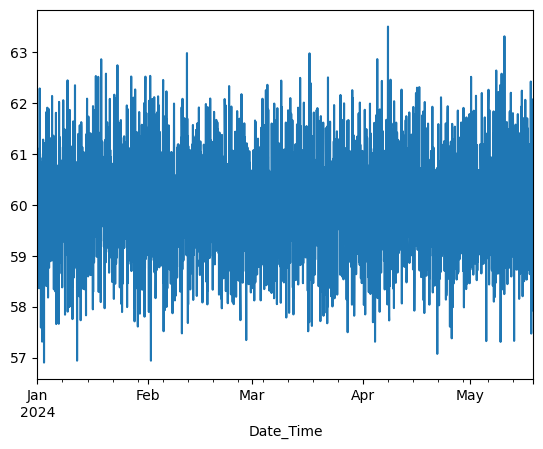

In [14]:
# Humidity variation with time
variation = weather_df.resample('h')['Humidity_pct'].mean()
variation.plot()

In [15]:
weather_df.head()

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Date_Time,,,,,
2024-01-14 21:12:46,San Diego,10.683001,41.195754,4.020119,8.233540
2024-05-17 15:22:10,San Diego,8.734140,58.319107,9.111623,27.715161
2024-05-11 09:30:59,San Diego,11.632436,38.820175,4.607511,28.732951
2024-02-26 17:32:39,Philadelphia,-8.628976,54.074474,3.183720,26.367303
2024-04-29 13:23:51,San Antonio,39.808213,72.899908,9.598282,29.898622


C:\Users\DELL\AppData\Local\Temp\ipykernel_8636\666232813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_15th['Hour'] = weather_df_15th.index.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_8636\666232813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_15th['Month'] = weather_df_15th.index.month


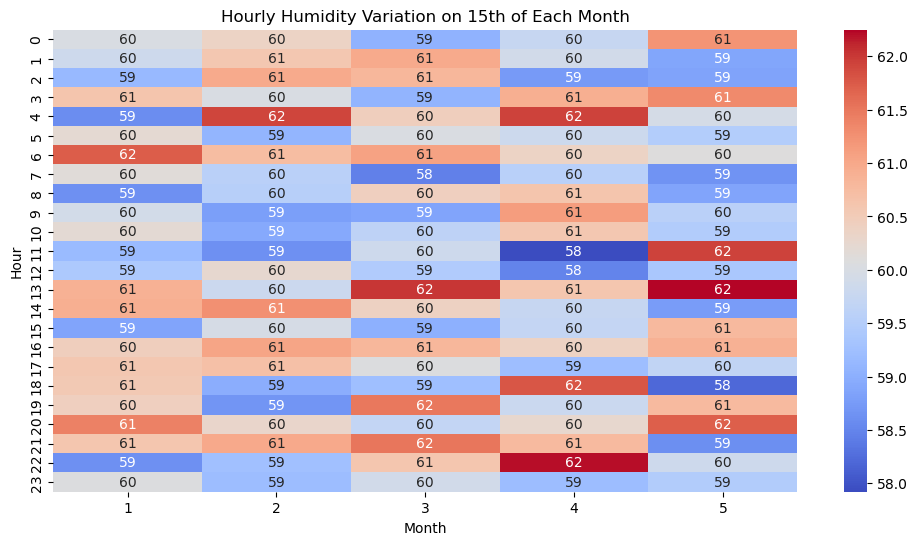

In [26]:
# Filter 15th of each month
weather_df_15th = weather_df[weather_df.index.day == 15]

# Create 'Hour' column
weather_df_15th['Hour'] = weather_df_15th.index.hour
weather_df_15th['Month'] = weather_df_15th.index.month

# Pivot table: Hour vs Month (to compare hourly pattern across months)
pivot = weather_df_15th.pivot_table(index='Hour', columns='Month', values='Humidity_pct', aggfunc='mean')

# Plot heatmap or line chart
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='coolwarm', annot=True)
plt.title('Hourly Humidity Variation on 15th of Each Month')
plt.xlabel('Month')
plt.ylabel('Hour')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8636\3040534304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_15th['Hour'] = weather_df_15th.index.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_8636\3040534304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_15th['Month'] = weather_df_15th.index.month


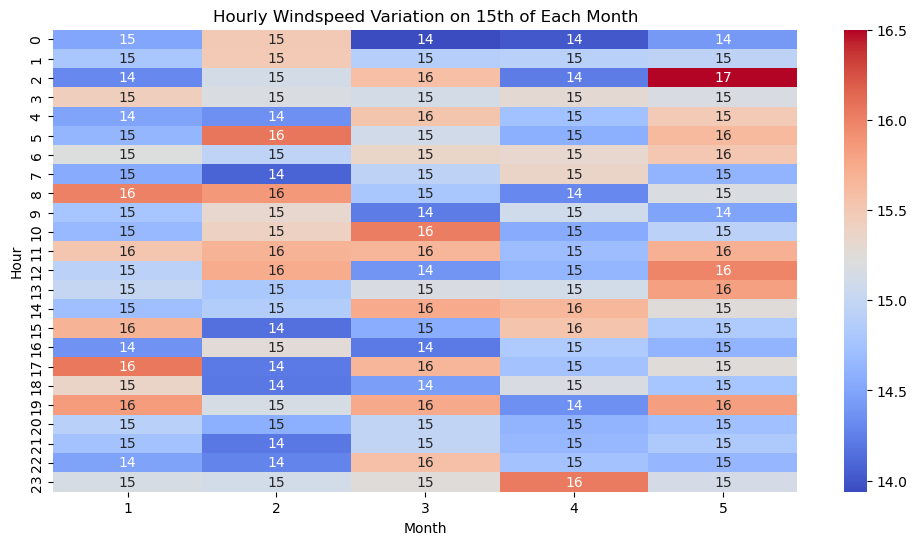

In [28]:
# Filter 15th of each month
weather_df_15th = weather_df[weather_df.index.day == 15]

# Create 'Hour' column
weather_df_15th['Hour'] = weather_df_15th.index.hour
weather_df_15th['Month'] = weather_df_15th.index.month

# Pivot table: Hour vs Month (to compare hourly pattern across months)
pivot = weather_df_15th.pivot_table(index='Hour', columns='Month', values='Wind_Speed_kmh', aggfunc='mean')

# Plot heatmap or line chart
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='coolwarm', annot=True)
plt.title('Hourly Windspeed Variation on 15th of Each Month')
plt.xlabel('Month')
plt.ylabel('Hour')
plt.show()
